# Notebook Cartão de Crédito

## 02.04 Obtendo a base de dados

In [1]:
import pandas as pd

dataframe = pd.read_csv('data/CC_GENERAL.csv')
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
dataframe.shape

(8950, 18)

In [3]:
dataframe.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## 02.05 Organizando os dados

In [4]:
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

In [5]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [6]:
dataframe.shape

(8950, 16)

In [7]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [8]:
dataframe['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

Adotaremos como estratégia a substituição desse valor pela mediana dos valores deste atributo de total de pagamentos minimos realizados. Não é um valor exato, e sim um aproximado por assim dizer.

In [9]:
dataframe.fillna(dataframe.median(), inplace=True)

missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


O próximo passo é normalizar nossos dados. Em alguns atributos relacionados à frequência, teremos um limite que varia de 0 a 1, sendo que 0 é 0% de frequência e 1, por sua vez, significa 100%. Para o atributo de balanço, não teremos a mesma organização de mínimo ou máximo, e isso pode fazer com que o algorítimo gere dados pouco satisfatórios para nós.

Para realizar a normalização dos dados todos entre zero e um, utilizaremos o biblioteca *Scikit learn*, importando o Normalizer do pacote ´´´sklearn.preprocessing´´´.

In [10]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


## 02.06 Executando o clustering

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

y_pred = kmeans.fit_predict(values)

## 03.04 Critérios de validação

Métricas externas: Precisamos ter os labels 
Métricas internas: Independente dos labels

Dentro das métricas internas:

Critério de compactação: que nos relata quão próximos estão os pontos em um mesmo cluster. 

Critério de separação: que indica quão bem separados estão os pontos em clusters diferentes. 


## 03.04 Matemática de Silhouette

**_Coeficiente de Silhouette_**

$\displaystyle s = \frac{\beta - \alpha}{max(\alpha,\ \beta)} $

em que $\alpha$ é a **distância média** entre o ponto de interesse e todos os outros pontos do **mesmo cluster**. Vamos verificar a compactação dos elementos.

$\beta$ é a **distância média** entre o ponto de interesse e todos os outros pontos do **cluster mais próximo**.

## 03.05 Calculando o Silhouette

In [12]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3646070028151538


## 04.04 Matemática do Davies-Bouldin

**_Índice Davies-Bouldin_**

$\displaystyle DB = \frac{1}{k} \sum^{k}_{i=1} max \ R_{ij} \ (i \neq j)$

Em que $R_{ij}$ é dado por

$\displaystyle R_{ij} = \frac{s_i + s_j}{d_{ij}}$

sendo $s$ a similaridade dentro do cluster, isto é, **compactação**.  O $d$ reflete a similaridade entre clusters, a **separação**. Assim temos os dois critérios importantes para uma boa validação



## 04.05 Calculando o Davies-Bouldin

In [13]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0751609635796862


## 05.04 Matemática do Calinski (Parte 1)

Índice de **Calinski-Harabasz** leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes, considerando a compactação e separação também.

$\displaystyle s = \frac{tr(B_k)}{tr(W_k)} \times \frac{n_E - k}{k - 1}$ 

$n_E$ é o número de elementos dentro do cluster.

$k$ é o número de clusters.

$B_k$ é a dispersão dos elementos entre clusters, sendo que a letra "B" significa between.

$W_k$ é a dispersão de elementos dentro do cluster. $W_k$ é calculado pela seguinte expressão:

$\displaystyle W_k = \sum_{q=1}^{k} \sum_{x \in C_q} (x - c_q) (x - c_q)^T$

em que $x$ é o valor do atributo e $c_q$ é o valor do centróide deste atributo para o cluster $q$.

$\sum_{x \in C_q} (x - c_q) (x - c_q)^T$ é uma matriz de **variância-covariância**(?)

**Esta explicação do curso está bem ruim. Atualizar quando possível**

## 05.05 Matemática do Calinski (Parte 2)

cálculo da matriz de variância-covariância para cada cluster

soma das matrizes de variância-covariância

cálculo do traço da matriz resultante

## 05.06 Matemática do Calinski (Parte 3)

$\displaystyle B_k = \sum_{q=1}^{k} n_q (c_q - c_E) (c_q - c_E)^T$

$k$ é o número de clusters.

$n_q$ = número de elementos no cluster

$c_q$ = centróide do cluster

$c_E$ = centróide dos elementos 

O índice de Calinski-Harabasz aqui é $s = 47,64$



## 05.07 Calculando o Calinski

In [14]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.5855153245093


## 06.04 A validação relativa

In [15]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)

    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)

    return s, dbs, calinski
    

In [16]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.440519908274


In [17]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3646398651689839 1.074978536956515 3431.7620165548224


In [18]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3516412432568085 1.113826411025816 3019.12430525073


In [19]:
s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

0.2936679028981092 1.2039344252129187 2395.0350348202214


## 06.05 A estrutura dos clusters

In [20]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [21]:
import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03995598135358681 3.4883763011498496 304.549473071749
0.3646398651689839 1.074978536956515 3431.7620165548224


## 06.06 A estabilidade dos clusters

In [22]:
set1, set2, set3 = np.array_split(values, 3)

s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36897094584161894 1.0581656052369077 1204.0560966145404
0.35325029594762064 1.1428827695610746 1194.939766435848
0.3668693099665975 1.1000994536694713 1167.5275312977556


# 07.04 Gerando gráficos

<function matplotlib.pyplot.show(*args, **kw)>

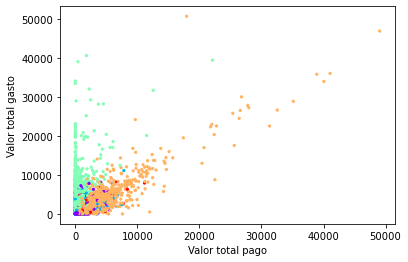

In [23]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show

## 07.05 Interpretação visual

In [24]:
import seaborn as sns

dataframe["cluster"] = labels
# sns.pairplot(dataframe[:], hue="cluster")

Note que este tipo de visualização não nos ajuda muito. Será que existem outras maneiras mais eficientes para lidar com clusters?

## 08.04 Descrevendo os atributos

In [25]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,1


In [26]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3287.0   444.316391   846.429565   0.000000    23.394451   
1        2642.0  3044.311461  2482.114159   6.824905  1263.747824   
2        1082.0  1799.423099  1979.373755   0.000000   508.591283   
3        1540.0  1145.339059  1664.041010   0.000000   212.974614   
4         399.0  1974.217809  1838.076622  70.794108  1012.508134   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          83.148283   411.938506   9630.367575            3287.0  0.774261   
1        2173.994774  4237.041814  18495.558550            2642.0  0.964891   
2        1099.666578  2321.485425  14581.459140            1082.0  0.862883   
3         558.133650  1373.997246  19043.138560            1540.0  0.927935   
4        1322.647480  2138.678431  11670.179850             399.0  0.989170   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       249.201172   4483.503862           3287.0  0.246341   
1        ...      1331.273048   8345.641905           2642.0  0.001772   
2        ...       887.859119  21235.065300           1082.0  0.115930   
3        ...       526.841759  18621.013310           1540.0  0.277899   
4        ...      7305.064790  76406.207520            399.0  0.019899   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346540  0.0  0.0  0.000000  0.444444  1.0  
1        0.023236  0.0  0.0  0.000000  0.000000  0.6  
2        0.186293  0.0  0.0  0.083333  0.142857  1.0  
3        0.366802  0.0  0.0  0.083333  0.545455  1.0  
4        0.092198  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

## 08.05 Analisando os valores

In [27]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.91547390e-02 2.30581917e-04 1.21698996e-01 4.82278963e-02
  7.35725210e-02 2.46403809e-02 1.72617165e-04 3.36721687e-05
  1.40088252e-04 7.94705003e-06 1.25159439e-04 2.86132629e-03
  9.43365633e-01 1.53844563e-01 5.68736541e-02 7.59957504e-05]
 [5.05916871e-01 2.73015289e-04 6.25606715e-02 3.68299693e-02
  2.57524646e-02 2.50028069e-01 6.82899869e-05 2.62382019e-05
  4.55393064e-05 5.70446997e-05 1.14550109e-03 1.34943261e-03
  7.18824149e-01 1.66271045e-01 1.80558687e-01 5.33603955e-07]
 [2.36537957e-01 2.16985362e-04 5.90300223e-02 3.35832245e-02
  2.54519642e-02 4.04086274e-01 5.17036418e-05 2.02343386e-05
  3.43414658e-05 6.60649526e-05 1.58615538e-03 1.09745723e-03
  5.37280111e-01 5.92393103e-01 1.05214325e-01 2.74078667e-05]
 [1.60583049e-01 2.45310265e-04 4.38129130e-01 2.56790685e-01
  1.81506844e-01 2.60076677e-02 2.04519716e-04 8.90590783e-05
  1.50755658e-04 9.46297171e-06 1.73812691e-04 6.17747277e-03
  6.02280929e-01 4.04406215e-01 8.58271588e-02 7.18891263e-05]
 [3.

## 08.06 Selecionando os atributos

In [28]:
max = len(centroids[0])

for i in range(max):
    print(dataframe.columns.values[i],"\n {:.4f}".format( centroids[:, i].var()))

BALANCE 
 0.0223
BALANCE_FREQUENCY 
 0.0000
PURCHASES 
 0.0196
ONEOFF_PURCHASES 
 0.0077
INSTALLMENTS_PURCHASES 
 0.0036
CASH_ADVANCE 
 0.0228
PURCHASES_FREQUENCY 
 0.0000
ONEOFF_PURCHASES_FREQUENCY 
 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
 0.0000
CASH_ADVANCE_FREQUENCY 
 0.0000
CASH_ADVANCE_TRX 
 0.0000
PURCHASES_TRX 
 0.0000
CREDIT_LIMIT 
 0.0365
PAYMENTS 
 0.0274
MINIMUM_PAYMENTS 
 0.0557
PRC_FULL_PAYMENT 
 0.0000


In [29]:
centroids[:, i].var()

1.043858965953787e-09

In [30]:
dataframe

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,0


In [31]:
len(dataframe.columns.values[:-1])

16

In [32]:
len([centroids[:, i].var() for i in range(len(centroids[0]))])

16

construindo um dataframe com duas colunas (variáveis, variância)

In [33]:
teste = pd.DataFrame(
    list(zip(dataframe.columns.values[:-1], [centroids[:, i].var() for i in range(len(centroids[0]))])),
    columns=['variable', 'variance']
)

Ordenando o df com base nos valores de variância

In [34]:
teste.sort_values(['variance'], ascending=False, inplace=True)
teste

,variable,variance
14,MINIMUM_PAYMENTS,5.573066e-02
12,CREDIT_LIMIT,3.651802e-02
13,PAYMENTS,2.742744e-02
5,CASH_ADVANCE,2.279259e-02
0,BALANCE,2.233873e-02
2,PURCHASES,1.964705e-02
3,ONEOFF_PURCHASES,7.716576e-03
4,INSTALLMENTS_PURCHASES,3.619164e-03
11,PURCHASES_TRX,3.432506e-06
10,CASH_ADVANCE_TRX,3.328991e-07


Removendo a variável "MINIMUM_PAYMENTS"

In [35]:
teste = teste.loc[teste['variable'] != 'MINIMUM_PAYMENTS']

Selecionando as 5 variáveis com maiores variância

In [36]:
teste.iloc[:5]

,variable,variance
12,CREDIT_LIMIT,0.036518
13,PAYMENTS,0.027427
5,CASH_ADVANCE,0.022793
0,BALANCE,0.022339
2,PURCHASES,0.019647


## 08.07 Filtrando os valores

In [37]:
dataframe.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3287.0,444.316391,846.429565,0.000000,23.394451,83.148283,411.938506,9630.367575
1,2642.0,3044.311461,2482.114159,6.824905,1263.747824,2173.994774,4237.041814,18495.558550
2,1082.0,1799.423099,1979.373755,0.000000,508.591283,1099.666578,2321.485425,14581.459140
3,1540.0,1145.339059,1664.041010,0.000000,212.974614,558.133650,1373.997246,19043.138560
4,399.0,1974.217809,1838.076622,70.794108,1012.508134,1322.647480,2138.678431,11670.179850


In [38]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         444.316391   630.614116    143.241332   5130.908661   814.983226   
1        3044.311461   388.784455   1622.217251   4490.934898   967.870896   
2        1799.423099   465.816645   3283.984219   3983.938274  4666.441630   
3        1145.339059  3269.532519    184.313078   4089.000098  3048.332290   
4        1974.217809   851.108872    418.674573   2220.050125  1333.712115   

         n_clients  
cluster             
0             3287  
1             2642  
2             1082  
3             1540  
4              399  


<ipython-input-38-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


Uma forma automatizada de fazer a selecao seria:

In [39]:
selecao = teste["variable"].iloc[:5]
selecao

12    CREDIT_LIMIT
13        PAYMENTS
5     CASH_ADVANCE
0          BALANCE
2        PURCHASES
Name: variable, dtype: object

In [40]:
alt_description = dataframe.groupby("cluster")[selecao]
alt_description.mean()

,CREDIT_LIMIT,PAYMENTS,CASH_ADVANCE,BALANCE,PURCHASES
cluster,,,,,
0,5130.908661,814.983226,143.241332,444.316391,630.614116
1,4490.934898,967.870896,1622.217251,3044.311461,388.784455
2,3983.938274,4666.441630,3283.984219,1799.423099,465.816645
3,4089.000098,3048.332290,184.313078,1145.339059,3269.532519
4,2220.050125,1333.712115,418.674573,1974.217809,851.108872


## 09.04 Interpretando os clusters (Parte 1)

Os clusters obtidos aqui estão em ordem diferente dos apresentados na aula.
clusters 2 e 3 estão trocados

In [41]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         444.316391   630.614116    143.241332   5130.908661   814.983226   
1        3044.311461   388.784455   1622.217251   4490.934898   967.870896   
2        1799.423099   465.816645   3283.984219   3983.938274  4666.441630   
3        1145.339059  3269.532519    184.313078   4089.000098  3048.332290   
4        1974.217809   851.108872    418.674573   2220.050125  1333.712115   

         n_clients  
cluster             
0             3287  
1             2642  
2             1082  
3             1540  
4              399  


<ipython-input-41-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


Analisando BALANCE

```
CLUSTER 0: clientes com os menores valores em gastos.
CLUSTER 1: clientes com os maiores valores em gastos.
CLUSTER 2:
CLUSTER 3: 
CLUSTER 4: 
```


Passaremos, então, para o atributo "PURCHASES", isto é, o valor em compras. Para este, não necessariamente precisamos fazer o mesmo esquema, e o menor valor está no cluster 1 e o maior em compras está no cluster 2, cuja diferença de valor é muito grande.

Olharemos o "CASH_ADVANCE" que diz respeito aos saques. Notaremos que o menor valor está no cluster 0, onde os clientes gastam menos no cartão de crédito, e já gastam mais no cluster seguinte. Porém, o maior valor em saques é no cluster 3.

```
CLUSTER 0: clientes com os menores valores em gastos. Menor valor em saques.
CLUSTER 1: clientes com os maiores valores em gastros. Menor valor em compras. Valor considerável em saques. 
CLUSTER 2: Maior valor em saques.
CLUSTER 3: Maior valor em compras com grande diferença.
CLUSTER 4:
```

Com base nas características que encontramos nos grupos por meio da análise dos três primeiros atributos, reescreveremos nossas anotações e deixaremos a interpretação mais simples.

```
CLUSTER 0: Clientes que gastam pouco.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com saques.
CLUSTER 3: Clientes que gastam muito com compras.
CLUSTER 4:
```

## 09.04 Interpretando os clusters (Parte 2)

In [42]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description


<ipython-input-42-ed4ec33fb318>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,444.316391,630.614116,143.241332,5130.908661,814.983226,3287
1,3044.311461,388.784455,1622.217251,4490.934898,967.870896,2642
2,1799.423099,465.816645,3283.984219,3983.938274,4666.441630,1082
3,1145.339059,3269.532519,184.313078,4089.000098,3048.332290,1540
4,1974.217809,851.108872,418.674573,2220.050125,1333.712115,399



```
CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com saques.
CLUSTER 3: Clientes que gastam muito com compras.
CLUSTER 4: Clientes com o menor limite.
```

In [43]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3287.0,0.246341,0.346540,0.0,0.0,0.000000,0.444444,1.0
1,2642.0,0.001772,0.023236,0.0,0.0,0.000000,0.000000,0.6
2,1082.0,0.115930,0.186293,0.0,0.0,0.083333,0.142857,1.0
3,1540.0,0.277899,0.366802,0.0,0.0,0.083333,0.545455,1.0
4,399.0,0.019899,0.092198,0.0,0.0,0.000000,0.000000,1.0


```
CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clients.
CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.
CLUSTER 2: Clientes que gastam muito com saques. Pagam as vezes.
CLUSTER 3: Clientes que gastam muito com compras. Melhores pagadores.
CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.
```

## 09.06 Os padrões de cada cluster

O Cluster 0 está bastante claro na sua proposta e representam a maior quantidade de clientes, isto é, aqueles que gastam pouco e tem o maior limite, além de tudo são bons pagadores da fatura.

O Cluster 1 representa os clientes que amais gastam, com foco no uso de cartão para saque de dinheiro e são os piores pagadores.

Cluster 2 possui uma quantidade padrão de clientes que gastam muito com saques.

O Cluster 3 representam os clientes que gastam com compras e pagam suas faturas adequadamente, o que reflete uma boa saúde financeira.

Cluster 4 refletem os clientes com o menor limite no cartão e que não são bons pagadores de suas faturas, por sorte, representam a menor quantidade de clientes da empresa.

Temos nosso cinco grupos feito, criamos labels para cada um dos clusters com base nos valores do centroides e todos os outros cálculos e médias que aprendemos a elaborar.

Fizemos uma descrição razoavelmente detalhada dos clientes, não simplesmente aqueles que gastam mais ou menos, precisamos utilizar vários atributos para identificarmos diferentes perfis.